# **Unsupervised Learning Visualization**

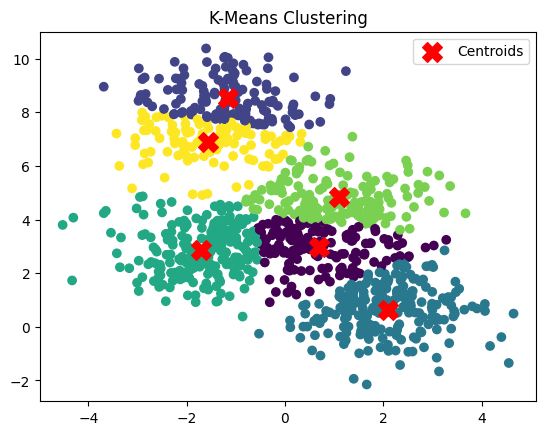

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Create synthetic data with modified parameters
X, y_true = make_blobs(n_samples=1000, centers=4, cluster_std=1.0, random_state=0)

# Fit KMeans with modified number of clusters
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Plot results
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroids')
plt.title("K-Means Clustering")
plt.legend()
plt.show()

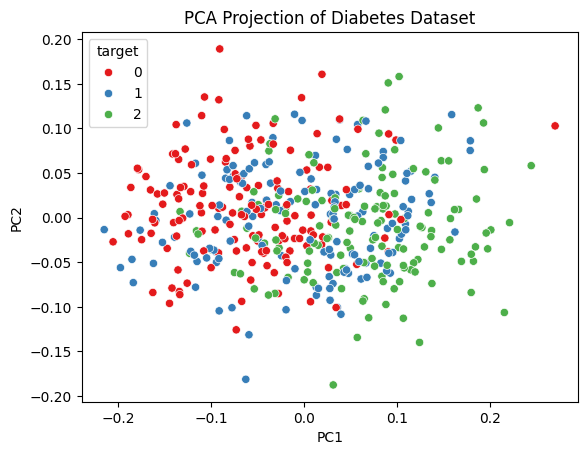

In [15]:
from sklearn.datasets import load_diabetes
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load Diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# PCA with 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Plot with labels using first two components (binning target for visualization)
df = pd.DataFrame(X_pca[:, :2], columns=['PC1', 'PC2'])

# Binning continuous target into 3 categories for visualization (low, medium, high)
y_binned = pd.qcut(y, q=3, labels=[0, 1, 2])
df['target'] = y_binned
sns.scatterplot(data=df, x='PC1', y='PC2', hue='target', palette='Set1')
plt.title("PCA Projection of Diabetes Dataset")
plt.show()

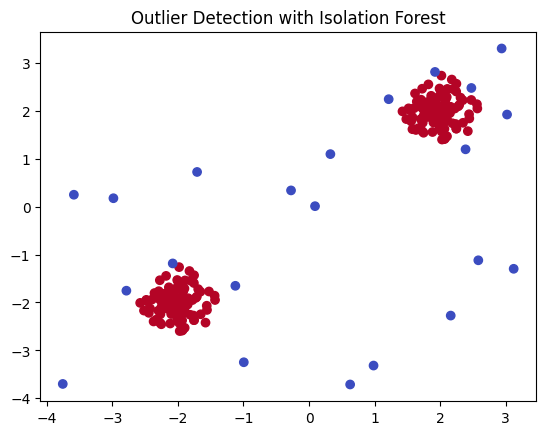

In [16]:
from sklearn.ensemble import IsolationForest

# Generate normal and outlier points
rng = np.random.RandomState(42)
X = 0.3 * rng.randn(100, 2)
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))
X_combined = np.r_[X + 2, X - 2, X_outliers]

# Fit Isolation Forest
clf = IsolationForest(contamination=0.1)
clf.fit(X_combined)
y_pred = clf.predict(X_combined)

# Visualize
plt.scatter(X_combined[:, 0], X_combined[:, 1], c=y_pred, cmap='coolwarm')
plt.title("Outlier Detection with Isolation Forest")
plt.show()